In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
df = pd.read_csv('/content/electricity_bill_dataset.csv')

In [3]:
# Select features and target column
X = df[['MonthlyHours']].values  # Feature column
y = df['ElectricityBill'].values  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

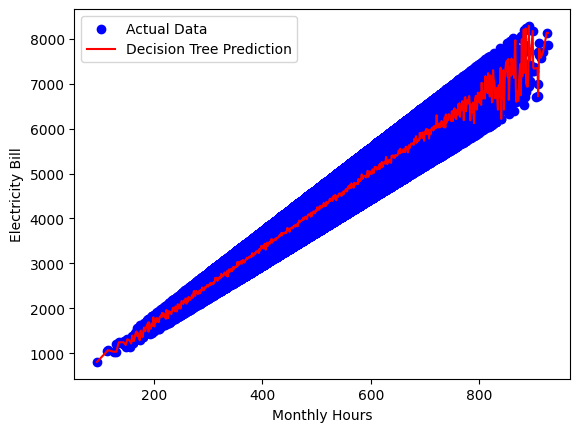

In [4]:

# Create and train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Plot results
X_sorted = np.sort(X, axis=0)
y_sorted = model.predict(X_sorted)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_sorted, y_sorted, color='red', label='Decision Tree Prediction')
plt.xlabel('Monthly Hours')
plt.ylabel('Electricity Bill')
plt.legend()
plt.show()

In [5]:

# Print model parameters
print(f'Model Depth: {model.get_depth()}')
print(f'Number of Leaves: {model.get_n_leaves()}')


Model Depth: 17
Number of Leaves: 737


In [8]:
pip install seaborn

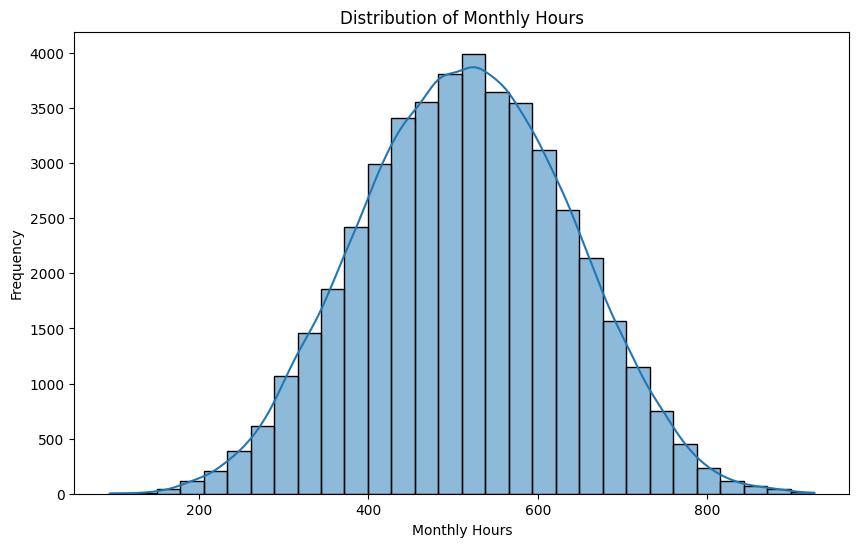

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyHours'], bins=30, kde=True)
plt.title('Distribution of Monthly Hours')
plt.xlabel('Monthly Hours')
plt.ylabel('Frequency')
plt.show()

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')


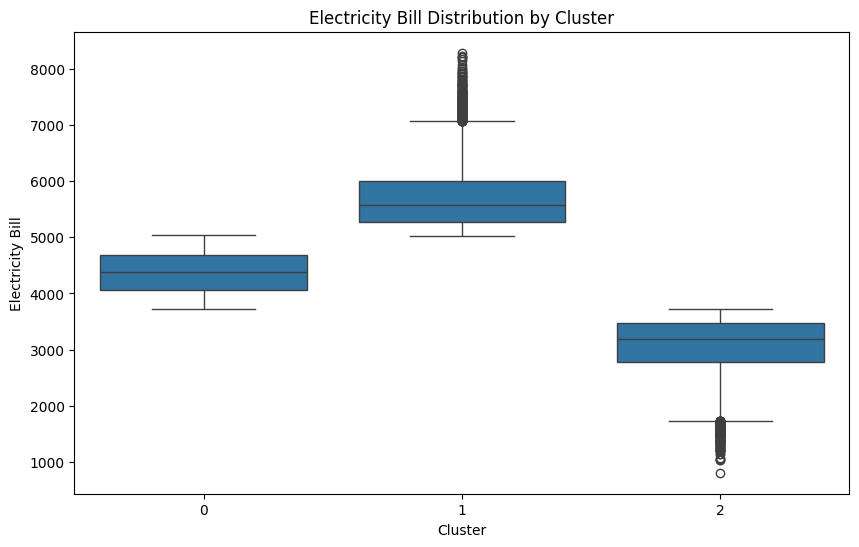

In [11]:
print(df.columns)
from sklearn.cluster import KMeans

# Assuming you have already defined your features
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
df['Cluster'] = kmeans.fit_predict(df[['MonthlyHours', 'ElectricityBill']])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='ElectricityBill', data=df)
plt.title('Electricity Bill Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Electricity Bill')
plt.show()

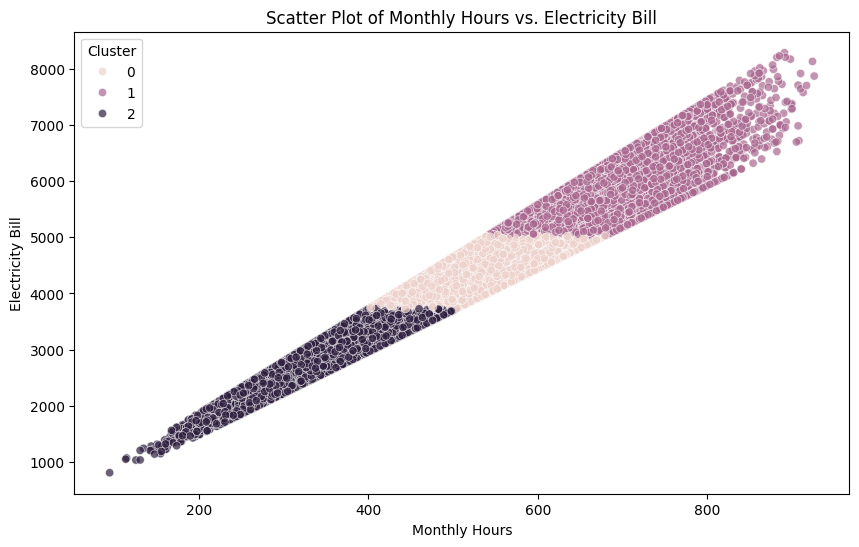

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyHours', y='ElectricityBill', data=df, hue='Cluster', alpha=0.7)
plt.title('Scatter Plot of Monthly Hours vs. Electricity Bill')
plt.xlabel('Monthly Hours')
plt.ylabel('Electricity Bill')
plt.show()

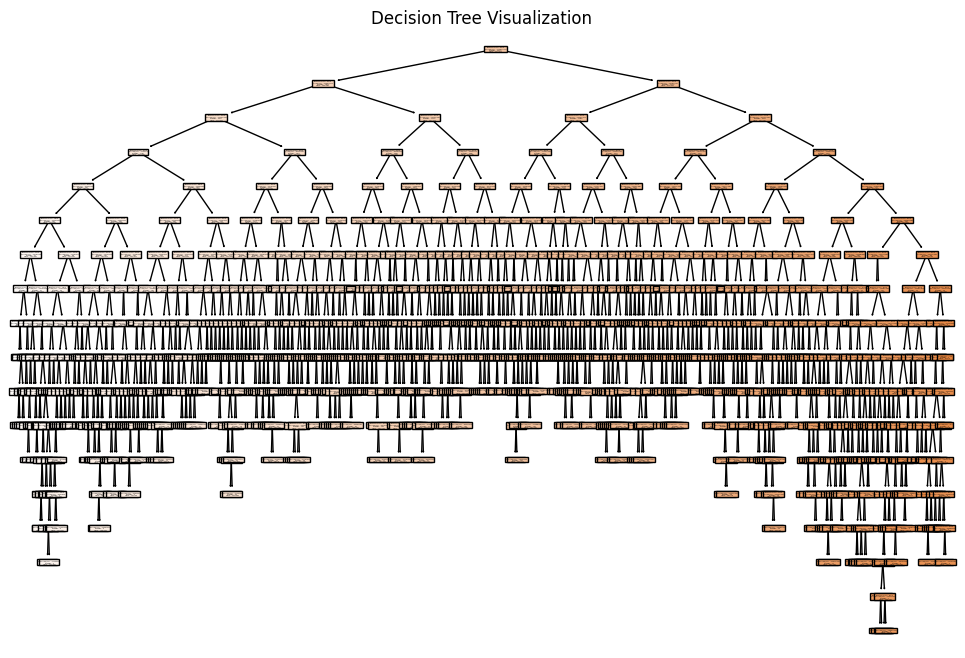

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Assuming df is your DataFrame and you have already defined X and y
X = df[['MonthlyHours']]  # Features
y = df['ElectricityBill']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, feature_names=['MonthlyHours'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

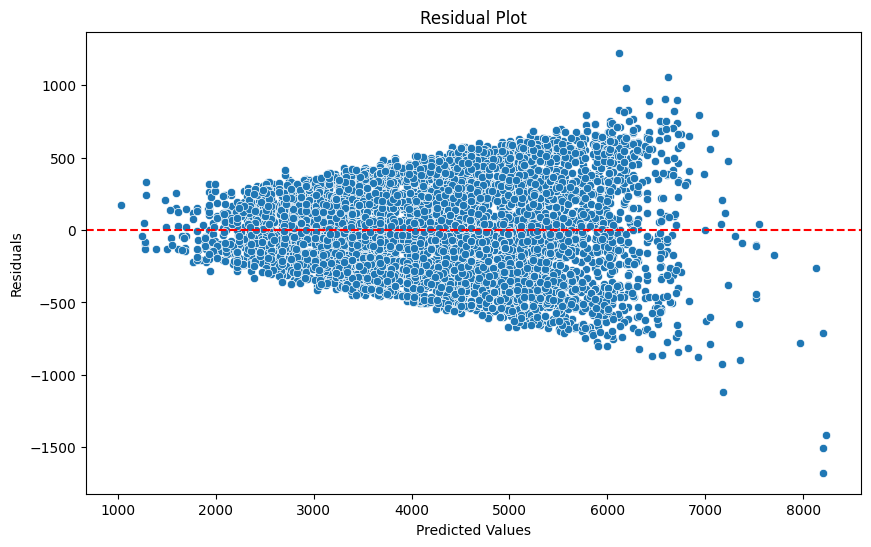

In [16]:
predictions = decision_tree_model.predict(X_test)
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()